the intercep is: [10.21536689]

the slope is: [0.08174846]

SSE = 8.982058395461499


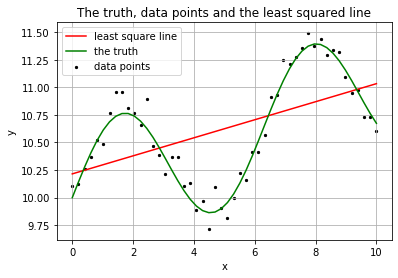

In [1]:
#This Python code is an exaple of solving the OLS problem using the closed-form solution formula

import numpy as np
import matplotlib.pyplot as plt


# Let's assume the truth behind the given data set is a general sin function (1D example)
# y = Asin(x) + ax + b + noise

Int_t = 10          #intercept of the linear function
Slope_t = 0.1       #slope of the linear function

mu, sigma = 0, 0.1     #parameters of the normal noise
N_sample = 50          #the number of sampled data points
mag_sin = 0.6          #magnitude of the sin function

rnd = np.random.normal(mu,sigma,N_sample)

x = np.linspace(0,10,N_sample)                # the input
y_t = mag_sin*np.sin(x) + x*Slope_t + Int_t   # the true output
y = y_t + rnd                                 # the target velues

# let's create the design matrix and the target value vectore

x_v = x[:,np.newaxis]  #turn x into a column vector
x1 = np.ones(len(x))
x1 = x1[:,np.newaxis]  #create a column vector with all 1s

X = np.hstack([x1,x_v])  #this is the design matrix

y_v = y[:, np.newaxis] #turn y into a column vector

###estimate the weights using the closed-form solution formula
X_T = X.transpose()
X_T_X = np.matmul(X_T, X)
X_T_y = np.matmul(X_T, y_v)
W = np.matmul(np.linalg.inv(X_T_X), X_T_y)

y_hat = W[0]+x*W[1]  # the predictions for the inputs

res = y_hat - y      # the residule
SSE = np.inner(res,res)  # the sum of squared error of the fitted linear squared line

print("the intercep is: {}\n".format(W[0]))
print("the slope is: {}\n".format(W[1]))
print("SSE = {}".format(SSE))

##creating the least-squared fitted line

plt.scatter(x, y, c="k", s=5, label="data points")
plt.plot(x, y_hat, 'r',label="least square line")
plt.plot(x, y_t,'g', label="the truth")
plt.title("The truth, data points and the least squared line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()


